# `image` 플롯

이 노트북은 `shap.plots.image` 함수를 사용하는 방법을 보여드리기 위해(그리고 문서화하기 위해) 고안되었습니다.

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf

# 사전 학습된 모델을 로드하고 설명할 이미지 두 개를 선택합니다.
model = ResNet50(weights='imagenet')
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)
X, y = shap.datasets.imagenet50()


2023-03-22 08:10:52.588752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 08:10:54.441410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 08:10:54.443565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 08:10:54.444005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [00:13, 13.10s/it]   
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


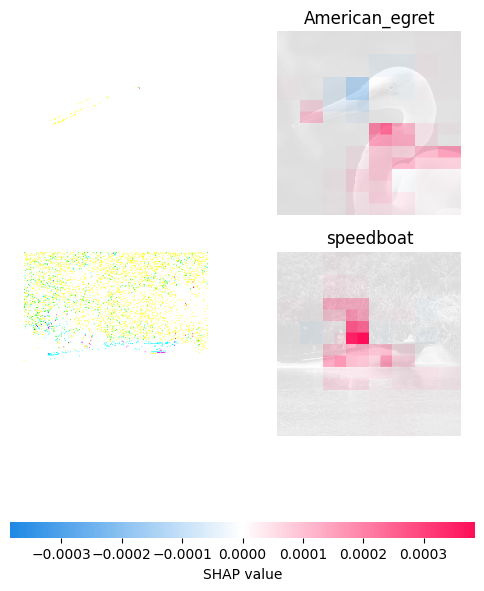

In [3]:

# 이미지넷 클래스 이름을 ID에서 이름으로 벡터화된 매핑 함수로 로드합니다.
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
    
# 입력 이미지의 분할을 마스킹하는 데 사용되는 마스커를 정의합니다(이 마스커는 흐린 배경을 사용함).
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# 기본적으로 파티션 설명기는 모든 파티션 설명기에 사용됩니다.
explainer = shap.Explainer(f, masker, output_names=class_names)

#  여기서는 기본 모델의 500개 평가를 사용하여 SHAP 값을 추정합니다.
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 